In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


dg = pd.read_csv("diagnostics.csv", sep=";")
pt = pd.read_csv("patients.csv", sep=";")


In [2]:
#Jointure

In [3]:
full_df = pd.merge(dg, pt, on="Patient_id", how="outer")


In [4]:
#Préparation des labels des epidermolyses

In [5]:
codes = {
    '257': "Epidermolyse bulleuse simple avec dystrophie musculaire",
    '304': "Epidermolyse bulleuse simple",
    '305': "Epidermolyse bulleuse jonctionnelle",
    '79403': "Epidermolyse bulleuse jonctionnelle avec atrésie pylorique",
    '158684': "Epidermolyse bulleuse simple avec atrésie du pylore",
    '251393': "Epidermolyse bulleuse jonctionnelle localisée"
}

filiation = {
    '305': ["305", "79403", "251393"],
    '304': ["304", "257", "158684"]
}


In [6]:
#Description par le sexe

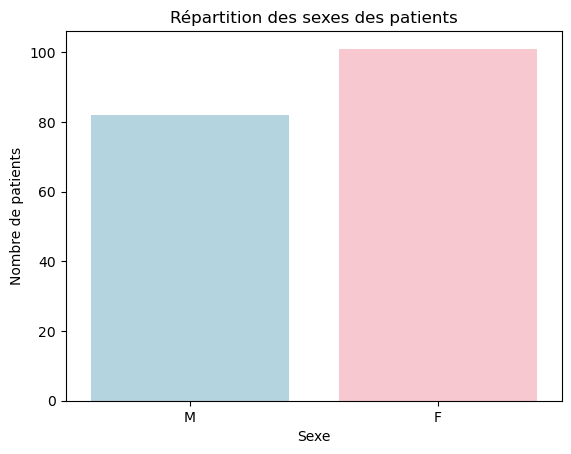

In [7]:




sex_patients = full_df[['Patient_id', 'Sexe']].drop_duplicates()


sns.countplot(x='Sexe', data=sex_patients, palette={"M": "lightblue", "F": "pink"})


plt.title("Répartition des sexes des patients")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")


plt.show()


In [8]:
#Description par tranche d'age >< 18

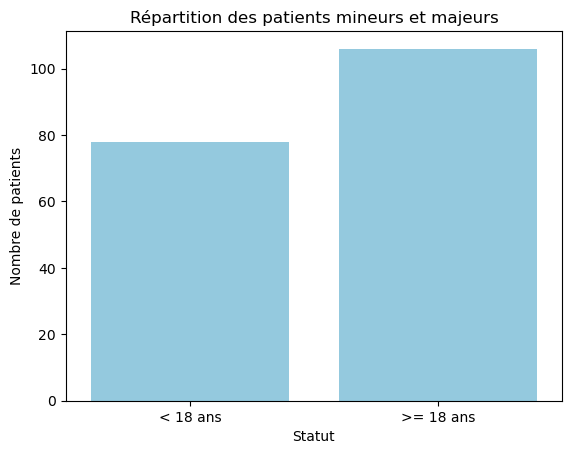

In [9]:



age_patients = full_df[['Patient_id', 'Annee_nassance']].drop_duplicates()
age_patients['age'] = 2024 - age_patients['Annee_nassance']
age_patients['majeur'] = age_patients['age'] >= 18


sns.countplot(x='majeur', data=age_patients, palette={"skyblue"})


plt.title("Répartition des patients mineurs et majeurs")
plt.xlabel("Statut")
plt.ylabel("Nombre de patients")
plt.xticks([0, 1], ["< 18 ans", ">= 18 ans"])


plt.show()


In [10]:
#Description par ville de prise en charge

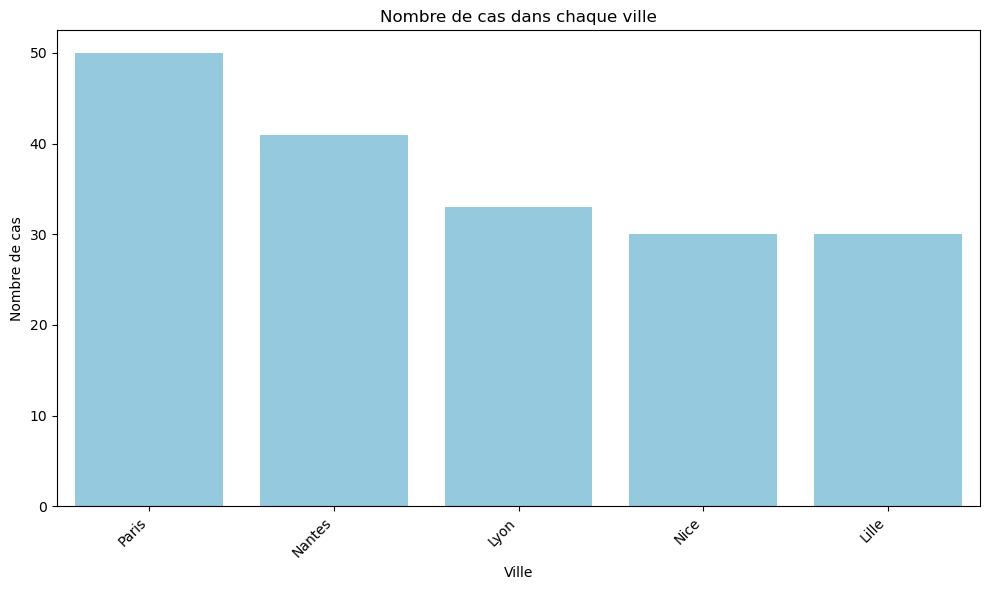

In [11]:


ville_patient = full_df[['Patient_id', 'Ville_prise_en_charge']].drop_duplicates()


ville_occurrences = ville_patient['Ville_prise_en_charge'].value_counts().reset_index()
ville_occurrences.columns = ['Ville_prise_en_charge', 'nombre_occurrences']


plt.figure(figsize=(10,6))
sns.barplot(x='Ville_prise_en_charge', y='nombre_occurrences', data=ville_occurrences,  palette={"skyblue"})


plt.title("Nombre de cas dans chaque ville")
plt.xlabel("Ville")
plt.ylabel("Nombre de cas")
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [12]:
#Description par durée de suivi en jour

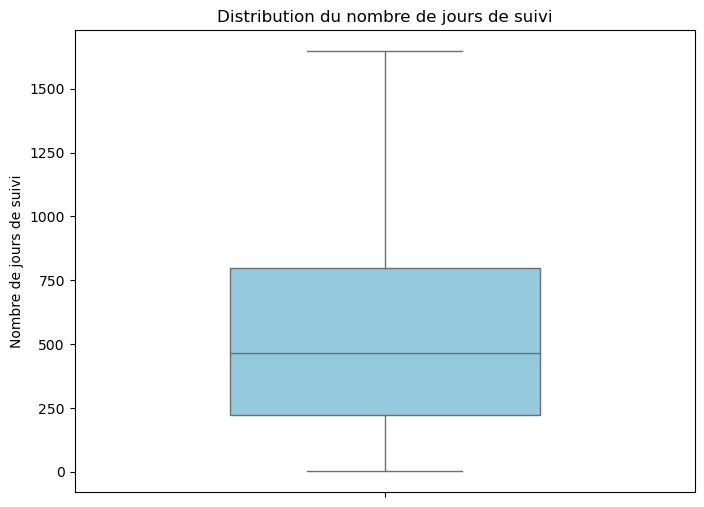

In [13]:



patient_suivi = full_df[['Patient_id', 'date_inclusion', 'date_derniere_activité']].drop_duplicates().dropna()


patient_suivi['date_inclusion'] = pd.to_datetime(patient_suivi['date_inclusion'], format="%d/%m/%Y")
patient_suivi['date_derniere_activité'] = pd.to_datetime(patient_suivi['date_derniere_activité'], format="%d/%m/%Y")


patient_suivi['jours'] = (patient_suivi['date_derniere_activité'] - patient_suivi['date_inclusion']).dt.days


plt.figure(figsize=(8,6))
sns.boxplot(y="jours", data=patient_suivi, color="skyblue", width=0.5, linewidth=1)


plt.title("Distribution du nombre de jours de suivi")
plt.ylabel("Nombre de jours de suivi")


plt.show()


In [14]:
#distribution des cas par groupe d’EBHs

[nan]


In [16]:



codes_df = pd.DataFrame(list(codes.items()), columns=['diagnostic', 'label_diag'])
codes_df['diagnostic'] = codes_df['diagnostic'].astype(str)

codes_df.columns = ["diagnostic", "label_diag"]


patient_diag = full_df[['Patient_id', 'diagnostic']].copy()


patient_diag['diagnostic'] = patient_diag['diagnostic'].astype(str).str.split('.').str[0]


patient_diag['diagnostic'] = patient_diag['diagnostic'].replace('nan', np.nan)


patient_diag = patient_diag.dropna(subset=['diagnostic'])


pd.set_option('display.max_rows', None)


pd.reset_option('display.max_rows')


patient_diag = patient_diag.merge(codes_df, how='left', on='diagnostic')

patient_diag['diagnostic'] = patient_diag['diagnostic'].astype('str') 



patient_diag['diag_parent'] = patient_diag['diagnostic'].map(lambda x: '305' if x in filiation['305'] else ('304' if x in filiation['304'] else None))


patient_diag = patient_diag.merge(codes_df, how='left', left_on='diag_parent', right_on='diagnostic')


patient_diag = patient_diag.rename(columns={'label_diag_x': 'son_label', 'label_diag_y': 'ancestor_label'})


patient_diag['ancestor_label'] = patient_diag['ancestor_label'].str.strip()
patient_diag['son_label'] = patient_diag['son_label'].str.strip()




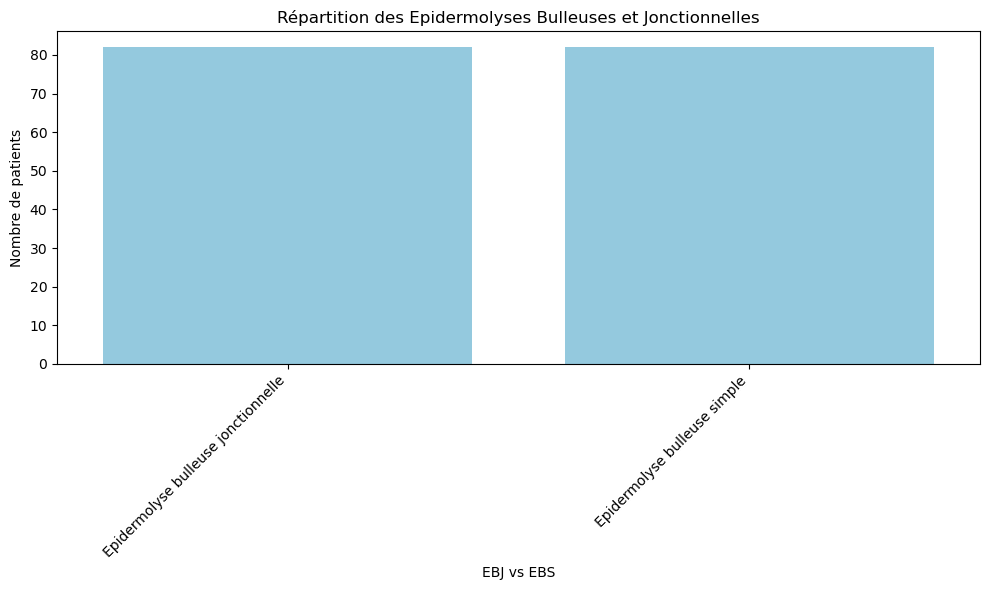

In [17]:

plt.figure(figsize=(10, 6))
sns.countplot(x='ancestor_label', data=patient_diag, palette={"skyblue"})


plt.title("Répartition des Epidermolyses Bulleuses et Jonctionnelles")
plt.xlabel("EBJ vs EBS")
plt.ylabel("Nombre de patients")


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




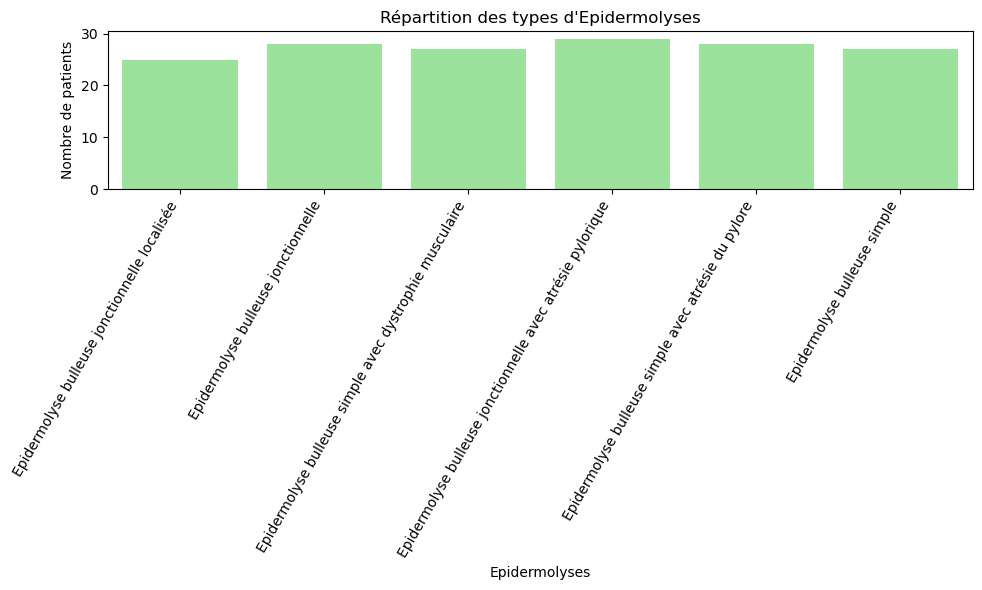

In [18]:

plt.figure(figsize=(10, 6))
sns.countplot(x='son_label', data=patient_diag, palette={"lightgreen"})


plt.title("Répartition des types d'Epidermolyses")
plt.xlabel("Epidermolyses")
plt.ylabel("Nombre de patients")
plt.xticks(rotation=60, ha='right')


plt.tight_layout()
plt.show()
